*Updated 01-12-2023 (First commited 02-27-2022)*

# K-means
---

1. K-means is used to cluster unlabeled instances in dataset into K groups that are defined by their centroids. The points in the same group can be further labeled or analyzed.
2. We first randomly choose K centroids in the space. Then we cluster each data point to its nearest centroids and distance is calculated using sum of the square of the difference. After all data points have been assigned to a cluster, we recompute the centroids of the cluster by taking the average of all the data points that belong to that cluster. Then we cluster the data points again based on the new centroids and we repeat process until centroids don't really change.
3. K-means is proved to find local minimum instead of global minimum. Thus the initialization of the centroids do matter to the outcome.

## Preliminary
---

### Statistics

#### Estimator

In statistics, an estimator is a **function that takes as inputs a set of observations** sampled from an unknown probability distribution $P_{\theta}(X)$ with the true parameter $\theta$ and **outputs the best guess of the parameter** $\hat{\theta}$ of $P_{\theta}(X)$. 

- An estimator is also a random variable.

#### Bias

The bias of an estimator measures **whether the expectation of the estimator is the same as the true parameter**. Let $\hat{\theta}$ be the output of an estimator for $\theta$. The bias of $\hat{\theta}$ as an estimator for $\theta$ is

$$ \operatorname{Bias}(\hat{\theta}, \theta) = \mathbb{E}[\hat{\theta}] - \theta $$

- $\operatorname{Bias}(\hat{\theta}, \theta) = 0$, then we say $\hat{\theta}$ is an **unbiased** estimator of $\theta$.
- $\operatorname{Bias}(\hat{\theta}, \theta) > 0$, $\hat{\theta}$ typically **overestimates** $\theta$.
- $\operatorname{Bias}(\hat{\theta}, \theta) < 0$, $\hat{\theta}$ typically **underestimates** $\theta$.

#### Variance (of an estimator)

The variance of an estimator measures the degree to which the **estimated parameters vary depending on the sampled observations**. Let $\hat{\theta}$ be the output of an estimator for $\theta$. The variance of $\hat{\theta}$ as an estimator is

$$ \operatorname{Var}(\hat{\theta}) = \mathbb{E}[(\hat{\theta} - \mathbb{E}[\hat{\theta}])^{2}] $$

#### Mean squared error 

In statistics, the mean squared error (MSE) is a risk (loss) function measures the **difference between an estimator $\hat{\theta}$ with the true parameter $\theta$**.

$$ \operatorname{MSE}(\hat{\theta}, \theta) = \mathbb{E}[(\hat{\theta} - \theta)^{2}] $$

If the estimator $\hat{\boldsymbol{\theta}}$ and the true parameter $\boldsymbol{\theta}$ are vectors,

$$ \operatorname{MSE}(\hat{\boldsymbol{\theta}}, \boldsymbol{\theta}) = \mathbb{E}[\lVert \hat{\boldsymbol{\theta}} - \boldsymbol{\theta} \rVert^{2}] $$

#### Bias-variance decomposition

A risk (loss) function can be often decomposed into a **bias, a variance and a noise term**. Here we take MSE as an example and expand it into a bias and variance term (noise is omitted).

$$ \operatorname{MSE}(\hat{\boldsymbol{\theta}}, \boldsymbol{\theta}) = \operatorname{Var}(\hat{\boldsymbol{\theta}}) + \operatorname{Bias}(\hat{\boldsymbol{\theta}}, \boldsymbol{\theta})^{2} $$

:::{admonition} Proof
:class: dropdown

$$
\begin{align}
\operatorname{MSE}(\hat{\boldsymbol{\theta}}, \boldsymbol{\theta}) & = \mathbb{E}[ \lVert \hat{\boldsymbol{\theta}} - \boldsymbol{\theta} \rVert^{2} ] \\
& = \mathbb{E}[ \lVert \hat{\boldsymbol{\theta}} - \mathbb{E}[\hat{\boldsymbol{\theta}}] + \mathbb{E}[\hat{\boldsymbol{\theta}}] - \boldsymbol{\theta} \rVert^{2}] & [\text{add and subtract } \mathbb{E}[\hat{\boldsymbol{\theta}}] ] \\
& = \mathbb{E}[ \lVert \hat{\boldsymbol{\theta}} - \mathbb{E}[\hat{\boldsymbol{\theta}}] \rVert^{2} + 2 \lVert \hat{\boldsymbol{\theta}} - \mathbb{E}[\hat{\boldsymbol{\theta}}] \rVert \lVert \mathbb{E}[\hat{\boldsymbol{\theta}}] - \boldsymbol{\theta} \rVert + \lVert \mathbb{E}[\hat{\boldsymbol{\theta}}] - \boldsymbol{\theta} \rVert^{2} ] & [(a + b)^{2} = a^{2} + 2ab + b^{2}] \\
& = \mathbb{E}[ \lVert \hat{\boldsymbol{\theta}} - \mathbb{E}[\hat{\boldsymbol{\theta}}] \rVert^{2} ] + \mathbb{E}[ 2 \lVert \hat{\boldsymbol{\theta}} - \mathbb{E}[\hat{\boldsymbol{\theta}}] \rVert \lVert \mathbb{E}[\hat{\boldsymbol{\theta}}] - \boldsymbol{\theta} \rVert ] + \mathbb{E}[ \lVert \mathbb{E}[\hat{\boldsymbol{\theta}}] - \boldsymbol{\theta} \rVert^{2} ] & [\text{Linearity of Expectation}] \\
& = \operatorname{Var}(\hat{\boldsymbol{\theta}}) + 2\mathbb{E}[ \lVert \hat{\boldsymbol{\theta}} - \mathbb{E}[\hat{\boldsymbol{\theta}}] \rVert] \mathbb{E}[ \lVert \mathbb{E}[\hat{\boldsymbol{\theta}}] - \boldsymbol{\theta} \rVert ] + \mathbb{E}[ \operatorname{Bias}(\hat{\boldsymbol{\theta}}, \boldsymbol{\theta})^{2} ] \\
& = \operatorname{Var}(\hat{\boldsymbol{\theta}}) + \operatorname{Bias}(\hat{\boldsymbol{\theta}}, \boldsymbol{\theta})^{2} & [\mathbb{E}[ \lVert \hat{\boldsymbol{\theta}} - \mathbb{E}[\hat{\boldsymbol{\theta}}] \rVert] = \lVert \mathbb{E}[\hat{\boldsymbol{\theta}}] - \mathbb{E}[\hat{\boldsymbol{\theta}}] \rVert = 0] \\
\end{align}
$$

:::

## Problem formulation
---

- K-means clustering algorithm is a unsupervised learning algorithm that aims to **cluster similar instances into the same group**. 

- The input to the algorithm is $n$ instances $\mathbf{x}_{1}, \mathbf{x}_{2}, \dots, \mathbf{x}_{n} \in \mathbb{R}^{d}$ **without labels** and the output of the algorithm is $k$ centroids $\mathbf{u}_{1}, \mathbf{u}_{2}, \dots, \mathbf{u}_{k} \in \mathbb{R}^{d}$, where $k$ is a hyperparameter used to control the number of centroids desired. 
        
- The goal of K-means clustering is to find the best $k$ centroids that minimizes a loss function (often **MSE loss** of the **$L_{2}$ norm or euclidean distance** of the difference vector) that captures the overall distances between the instances and the centroids assigned.

    $$ \operatorname{loss}(\mathbf{u}_{1}, \dots, \mathbf{u}_{k}) = \sum_{i = 1}^{n} \lVert \mathbf{x}_{i} - \mathbf{u}_{x_{i}} \rVert^{2} $$

    where $\mathbf{u}_{x_{i}}$ is the centroid that instance $\mathbf{x}_{i}$ is assigned to.
   
- Another way to write the loss function is to consider the distances between each centroid and the instances in the cluster that the centroid represents. The benefit of this formulation is that the clusters that the centroids represent are separated as variables, which is easier to do algorithm analyzing.

    $$ \operatorname{loss}(\mathbf{u}_{1}, \dots, \mathbf{u}_{k}, C_{\mathbf{u}_{1}}, \dots, C_{\mathbf{u}_{k}}) = \sum_{i = 1}^{k} \sum_{\mathbf{x} \in C_{\mathbf{u}_{i}}} \lVert \mathbf{x} - \mathbf{u}_{i} \rVert^{2} $$
    
    where $C_{\mathbf{u}_{i}}$ is the cluster that centroid $\mathbf{u}_{i}$ represents.

## K-means using Lloyd's algorithm
---

### Algorithm 

> **Function**: K-means  
> **Input**: a set of instances $\mathbf{x}_{1}, \mathbf{x}_{2}, \dots, \mathbf{x}_{n}$ and a hyperparameter $k$.  
> **Output**: a set of centroids $\mathbf{u}_{1}, \mathbf{u}_{2}, \dots, \mathbf{u}_{k}$.
> 1. Initialize cluster centroids $\mathbf{u}_{1}, \mathbf{u}_{2}, \dots, \mathbf{u}_{k}$ by randomly drawing $k$ instances as the centroids.
> 2. Repeat until convergence or a fixed number of iterations: 
>     1. **Assignment step**: get the nearest centroid $\mathbf{c}_{i}$ for each instance $\mathbf{x}_{i}$:
>
>         $$ \mathbf{c}_{i} = \arg \min_{j} \lVert \mathbf{x}_{i} - \mathbf{u}_{j} \rVert^{2} $$
>
>     2. **Refitting step**: update each centroid based on the instances in its cluster:
>
>         $$ \mathbf{u}_{j} = \frac{\sum_{i}^{m} \mathbb{1}_{\mathbf{c}_i = j} \mathbf{x}_{i}}{\sum_{i}^{m} \mathbb{1}_{\mathbf{c}_{i} = j}} $$

### Convergence of Lloyd's algorithm

K-means solved using Lloyd's algorithm is guaranteed to converge to a local minimum because:
- The loss value is guaranteed to be smaller or stay the same in the assignment step because each instance $\mathbf{x}_{i}$ gets the nearest centroid. 

    $$ \operatorname{loss}( \mathbf{u}_{1}, \dots, \mathbf{u}_{k}, (C_{\mathbf{u}_{1}}, \dots, C_{\mathbf{u}_{k}})^{t + 1} ) \leq \operatorname{loss}( \mathbf{u}_{1}, \dots, \mathbf{u}_{k}, (C_{\mathbf{u}_{1}}, \dots, C_{\mathbf{u}_{k}})^{t} ) $$
        
- The loss value is guaranteed to be smaller or stay the same in the refitting step.

    $$ \operatorname{loss}( (\mathbf{u}_{1}, \dots, \mathbf{u}_{k})^{t + 1}, (C_{\mathbf{u}_{1}}, \dots, C_{\mathbf{u}_{k}})^{t + 1} ) \leq \operatorname{loss}( (\mathbf{u}_{1}, \dots, \mathbf{u}_{k})^{t}, (C_{\mathbf{u}_{1}}, \dots, C_{\mathbf{u}_{k}})^{t + 1} ) $$
    
    To see why this is true, consider a single centroid-cluster pair $\mathbf{u}$ and $C_{\mathbf{u}}$, for all instances $\mathbf{x}_{1}, \mathbf{x}_{2}, \dots, \mathbf{x}_{n}$ that belongs to the cluster $C_{\mathbf{u}}$, the loss function $\operatorname{loss}(\mathbf{u}, C_{\mathbf{u}})$ will be minimized when $\mathbf{u}$ is the average of the instances in $C_{\mathbf{u}}$:
    
    $$ \boldsymbol{\mu} = \frac{1}{n} \sum_{\mathbf{x} \in C_{\mathbf{u}}} \mathbf{x}_{i} = \arg \min_{\mathbf{u} \in \mathbb{R}^{d}} \sum_{\mathbf{x} \in C_{\mathbf{u}}} \lVert \mathbf{x} - \mathbf{u} \rVert^{2} = \arg \min_{\mathbf{u} \in \mathbb{R}^{d}} \operatorname{loss}(\mathbf{u}, C_{\mathbf{u}}) $$
    
    because of the equation below derived from the bias-variance decomposition of MSE function:
    
    $$ \operatorname{loss}(\mathbf{u}, C_{\mathbf{u}}) = \operatorname{loss}(\mathbf{\boldsymbol{\mu}}, C_{\mathbf{\mathbf{u}}}) + n \lVert \boldsymbol{\mu} - \mathbf{u} \rVert $$
    
    where $n$ is the number of instances in the cluster $C_{\mathbf{u}}$.
    
    :::{admonition} Proof
    :class: dropdown
    
    $$
    \begin{align}
    \operatorname{loss}(\mathbf{u}, C_{\mathbf{u}}) & = \operatorname{loss}(\boldsymbol{\mu}, C_{\mathbf{u}}) + n\lVert \boldsymbol{\mu} - \mathbf{u} \rVert^{2} \\
    & = \sum_{\mathbf{x} \in C_{\mathbf{u}}} \lVert \mathbf{x} - \boldsymbol{\mu} \rVert^{2} + n\lVert \boldsymbol{\mu} - \mathbf{u} \rVert^{2} \\
    & = \sum_{\mathbf{x} \in C_{\mathbf{u}}} \left( \lVert \mathbf{x} \rVert^{2} - 2\lVert \mathbf{x} \rVert \lVert \boldsymbol{\mu} \rVert + \lVert \boldsymbol{\mu} \rVert^{2} \right) + n\left( \lVert \boldsymbol{\mu} \rVert^{2} - 2 \lVert \boldsymbol{\mu} \rVert \lVert \mathbf{u} \rVert + \lVert \mathbf{u} \rVert^{2} \right) \\
    & = \sum_{\mathbf{x} \in C_{\mathbf{u}}} \left( \lVert \mathbf{x} \rVert^{2} - 2\lVert \mathbf{x} \rVert \lVert \frac{S}{n} \rVert + \lVert \frac{S}{n} \rVert^{2} \right) + n\left( \lVert \frac{S}{n} \rVert^{2} - 2 \lVert \boldsymbol{\mu} \rVert \lVert \mathbf{u} \rVert + \lVert \mathbf{u} \rVert^{2} \right) & \left[ \text{replace some } \boldsymbol{\mu} \text{ with } \frac{S}{n} \text{ where } S = \sum_{\mathbf{x} \in C_{\mathbf{u}}} \mathbf{x} \right] \\
    & = \sum_{\mathbf{x} \in C_{\mathbf{u}}} \lVert \mathbf{x} \rVert^{2} - \sum_{\mathbf{x} \in C_{\mathbf{u}}} 2\lVert \mathbf{x} \rVert \lVert \frac{S}{n} \rVert + \sum_{\mathbf{x} \in C_{\mathbf{u}}} \lVert \frac{S}{n} \rVert^{2} + n\lVert \frac{S}{n} \rVert^{2} - 2n\lVert \boldsymbol{\mu} \rVert \lVert \mathbf{u} \rVert + n\lVert \mathbf{u} \rVert^{2} \\
    & = \sum_{\mathbf{x} \in C_{\mathbf{u}}} \lVert \mathbf{x} \rVert^{2} - 2 \lVert S \rVert \lVert \frac{S}{n} \rVert + n\lVert \frac{S}{n} \rVert^{2} + n\lVert \frac{S}{n} \rVert^{2} - 2n\lVert \boldsymbol{\mu} \rVert \lVert \mathbf{u} \rVert + n\lVert \mathbf{u} \rVert^{2} & \left[ \sum_{\mathbf{x} \in C_{\mathbf{u}}} \lVert x \rVert = \lVert S \rVert \text{ and } \sum_{\mathbf{x} \in C_{\mathbf{u}}} 1 = n \right] \\ 
    & = \sum_{\mathbf{x} \in C_{\mathbf{u}}} \lVert \mathbf{x} \rVert^{2} - 2n\lVert \boldsymbol{\mu} \rVert \lVert \mathbf{u} \rVert + n\lVert \mathbf{u} \rVert^{2} & \left[ \lVert S \rVert \lVert \frac{S}{n} \rVert = n\lVert \frac{S}{n} \rVert^{2}  \right] \\ 
    & = \sum_{\mathbf{x} \in C_{\mathbf{u}}} ( \lVert \mathbf{x} \rVert^{2} - 2\lVert \boldsymbol{\mu} \rVert \lVert \mathbf{u} \rVert + \lVert \mathbf{u} \rVert^{2} ) \\
    & = \sum_{\mathbf{x} \in C_{\mathbf{u}}} \lVert \mathbf{x} - \mathbf{u} \rVert^{2} \\
    \end{align}
    $$
    
    Since $\lvert C_{\mathbf{\mathbf{u}}} \rvert \cdot \lVert \boldsymbol{\mu} - \mathbf{u} \rVert$ is always positive, 
    
    $$ \operatorname{loss}(\boldsymbol{\mu}, C_{\mathbf{u}}) \leq \operatorname{loss}(\mathbf{\mathbf{u}}, C_{\mathbf{\mathbf{u}}}) $$
    
    :::

## The K-means++ initializer
---

Although the default behavior of the K-means algorithm is to initialize the centroids randomly, the quality of the final solution depends heavily on the initialization because K-means is only guaranteed to converge to a local point. 

The K-means++ initializer is a special way of initializing the centroids so that
- the convergence of K-means is faster,
- the final loss is bounded (the quality of the final solution won't be very bad).

> 1. Pick an instance $\mathbf{x}$ uniformly at random and set $T \gets \{\mathbf{x}\}$
> 1. While $\lvert T \rvert < k$:
>     1. Pick an instance $\mathbf{x}$ at random, with probability proportional to 
>     
>         $$ \operatorname{cost}(\mathbf{x}, T) = \min_{\mathbf{u} \in T} \lVert \mathbf{x} - \mathbf{u} \rVert^{2} $$
>     
>     1. Add $\mathbf{x}$ to $T$.

## Reference 
---

1. https://stanford.edu/~cpiech/cs221/handouts/kmeans.html
1. https://cseweb.ucsd.edu/~dasgupta/291-geom/kmeans.pdf

## Implementation
***

94it [00:00, 591.45it/s, KMeans=1.01]                                                                                                                                                                                                                                                   
94it [00:00, 1217.76it/s, KMeans=0.943]                                                                                                                                                                                                                                                 
94it [00:00, 1212.54it/s, KMeans=0.921]                                                                                                                                                                                                                                                 
94it [00:00, 1192.24it/s, KMeans=0.941]                                                                                                                      

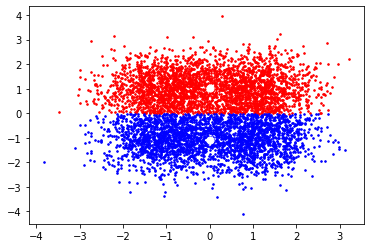

In [ ]:
#https://takoscribe.com/2020/12/29/kmeans-clustering-with-pytorch/

import functools

import tqdm
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

class GradientKMeans(nn.Module):
    def __init__(self, num_centroids, n_epochs, batch_size, lr=1e-2):
        super().__init__()
        
        self.num_centroids = num_centroids
        self.n_epochs = n_epochs
        self.batch_size = batch_size
        self.lr = lr

    def _initialize(self, x):
        assignment = [i % self.num_centroids for i in range(x.size(0))]
        random_indices = torch.randperm(len(assignment))
        random_assignment = torch.LongTensor(assignment)[random_indices]
        for i in range(self.num_centroids):
            self.centroids.data[i] = x[random_assignment == i].mean(0)
        
    def _assign(self, x):
        indices = ((x[:,None] - self.centroids) ** 2).mean(2).argmin(1)
        
        return indices
 
    def forward(self, x):
        return self._assign(x)
    
    def fit(self, X):
        self.centroids = nn.Parameter(torch.zeros(self.num_centroids, X.shape[1]))
        self.optimizer = torch.optim.Adam(self.parameters(), lr=self.lr)
        self.loss = nn.MSELoss()
        centroids_init = False
        
        cost_window = 25
        costs = []

        X_t = torch.utils.data.TensorDataset(torch.Tensor(X), torch.zeros((X.shape[0], )))
        iterator = torch.utils.data.DataLoader(X_t, batch_size=self.batch_size, shuffle=True)
        for i in range(self.n_epochs):
            with tqdm.tqdm(total=len(X) // self.batch_size) as progress_bar:
                for x, _ in iterator:
                    if not centroids_init: 
                        self._initialize(x)
                        centroids_init = True

                    assignment = self._assign(x)
                    
                    self.optimizer.zero_grad()
                    means = self.centroids[assignment]
                    cur_cost = self.loss(x, means)
                    cur_cost.backward()
                    self.optimizer.step()
                    
                    costs.append(cur_cost.item())
                    
                    progress_bar.set_postfix({
                        'KMeans': float(functools.reduce(lambda x, y: x + y, costs[-cost_window:])) /  len(costs[-cost_window:])
                    })
                    progress_bar.update(1) # 1 step
                    
    def predict(self, X):
        Y = self(torch.Tensor(X))
        
        return Y
    
    def get_centroids(self):
        centroids = self.centroids.cpu().detach().numpy()
        
        return centroids

centers = [[-1, 1], [1, 1], [-1, -1], [1, -1]]
n_clusters = len(centers)
n_samples = 6000
X, Y = make_blobs(n_samples=n_samples, centers=centers, cluster_std=0.7, random_state=40)

gradient_kmeans = GradientKMeans(2, 10, 64)
gradient_kmeans.fit(X)

y_true = gradient_kmeans.predict(X)
centroids = gradient_kmeans.get_centroids()

plt.figure(1)
for k, col in enumerate(["r", "b", "g", "m", "y", "c"]):
    cluster_data = y_true == k
    plt.scatter(X[cluster_data, 0], X[cluster_data, 1], c=col, marker=".", s=10)

plt.scatter(centroids[:, 0], centroids[:, 1], c="w", s=50)
plt.show()